# ENV

In [2]:
# !pip install koreanize_matplotlib

In [3]:
import pandas as pd
import numpy as np
import csv
import random

import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from PIL import Image

# DATA 준비

In [4]:
HOME=os.getcwd()
print(HOME)

c:\Users\SBA\Downloads


In [5]:
data_path = HOME+"/dataset"
train_path = os.path.join(data_path, "train")
valid_path = os.path.join(data_path, "valid")

train_images_path = os.path.join(train_path, "images")
train_labels_path = os.path.join(train_path, "labels")

valid_images_path = os.path.join(valid_path, "images")
valid_labels_path = os.path.join(valid_path, "labels")

In [6]:
# EDA위한 파일명 가져오기
train_images_list = glob.glob(train_images_path+'/*')
train_labels_list = glob.glob(train_labels_path+'/*')

valid_images_list = glob.glob(valid_images_path+'/*')
valid_labels_list = glob.glob(valid_labels_path+'/*')

# 설정 잘 됐나 확인
print(train_images_list[0])
print(train_labels_list[0])
len(train_images_list), len(valid_images_list)

c:\Users\SBA\Downloads/dataset\train\images\Suwon_CH01_20200720_1700_MON_9m_NH_highway_TW5_sunny_FHD_001.png
c:\Users\SBA\Downloads/dataset\train\labels\Suwon_CH01_20200720_1700_MON_9m_NH_highway_TW5_sunny_FHD_001.txt


(23951, 3333)

In [7]:
# 파일명만 남기기
train_images_name_list = list(map(lambda x: x.split('\\')[-1], train_images_list))
valid_images_name_list = list(map(lambda x: x.split('\\')[-1], valid_images_list))

train_labels_name_list = list(map(lambda x: x.split('\\')[-1], train_labels_list))
valid_labels_name_list = list(map(lambda x: x.split('\\')[-1], valid_labels_list))

print(train_images_name_list[0])

Suwon_CH01_20200720_1700_MON_9m_NH_highway_TW5_sunny_FHD_001.png


In [27]:
from collections import Counter

# 분석위해 csv 파일 만들기
for mode, lst in zip(["train", "valid"], [train_images_name_list, valid_images_name_list]):
    with open("highway_"+mode+".csv", "w", newline="") as f:
        writer = csv.writer(f)

        # csv에 title 추가
        title = "city CH date time dayofweek meter busy road way weather video num cnt car bus truck".split()
        writer.writerow(title)

        # csv에 한 행씩 content 추가
        for name in lst:
            name_splited = name[:-4].split('_') # 확장자 빼고
            name_splited.append(1)  # cnt
            
            # labels 파일 읽어서 car bus truck 개수 세기
            label_path = os.path.join(HOME, "dataset", mode, "labels", name[:-4]+".txt" )
            class_num = [0, 0, 0]
            with open(label_path, "r") as f:
                contents = f.read()
                contents_splited = contents.split('\n')
                #### ver 1
                for line in contents_splited:        # 각 line의
                    if line: 
                        cls_ = int(line.split()[0])   # 첫번째 숫자가 class
                        class_num[cls_] += 1
                
            name_splited.extend(class_num)
            writer.writerow(name_splited)


# EDA

## 이미지 확인

In [47]:
def draw_(lst):
    plt.figure(figsize=(15,30))
    row = 5
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(Image.open(lst[i]))
        # plt.title(f"{lst[i].split('\\')[-1]}", size=20)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

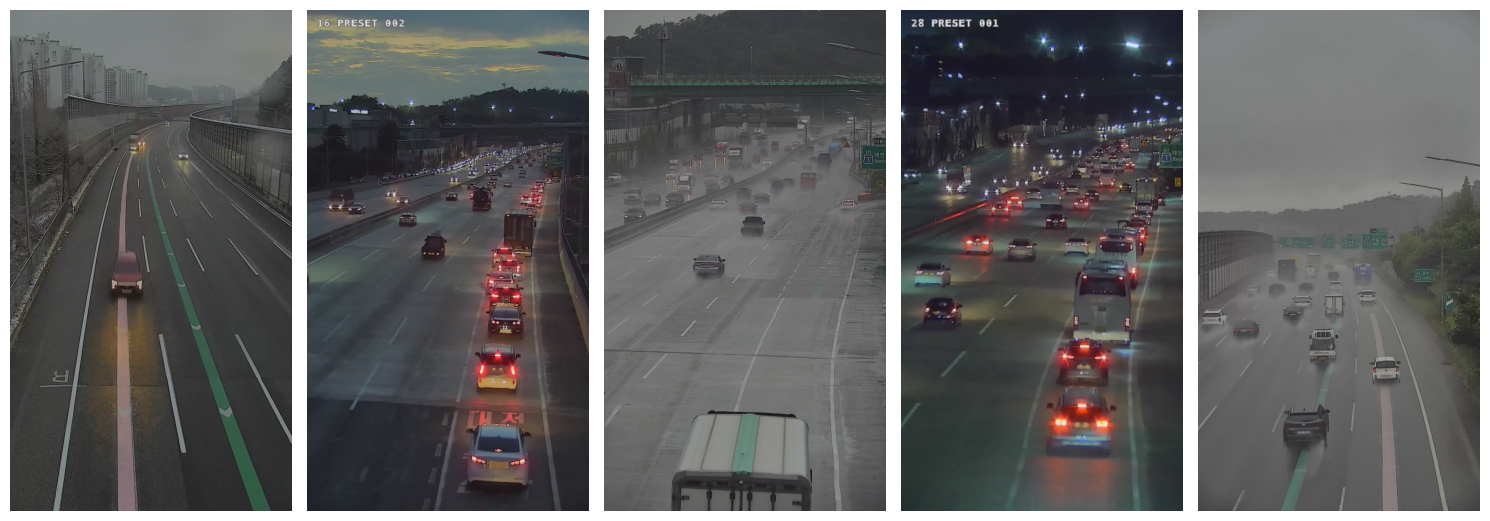

In [53]:
# train sample image
draw_(random.sample(train_images_list, 5))

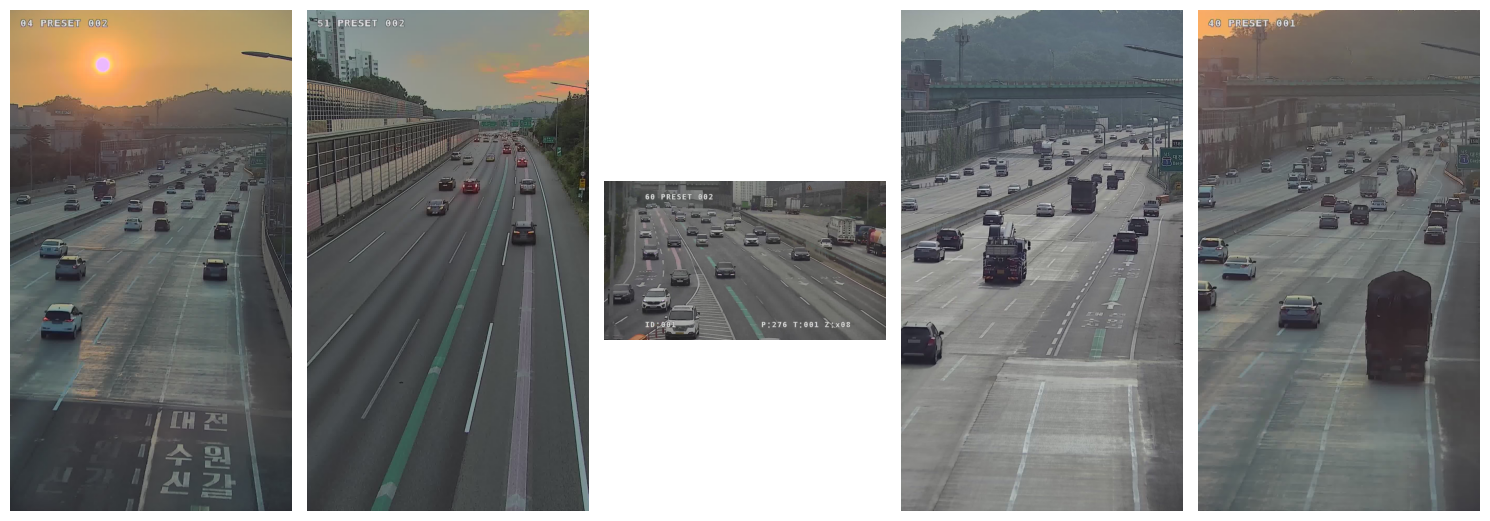

In [52]:
# valid sample image
draw_(random.sample(valid_images_list, 5))

## df 분석

In [11]:
train_df = pd.read_csv('highway_train.csv')
valid_df = pd.read_csv('highway_valid.csv')

In [12]:
train_df.head()

,city,CH,date,time,dayofweek,meter,busy,road,way,weather,video,num,cnt,car,bus,truck
0,Suwon,CH01,20200720,1700,MON,9m,NH,highway,TW5,sunny,FHD,1,1,14,0,14
1,Suwon,CH01,20200720,1700,MON,9m,NH,highway,TW5,sunny,FHD,2,1,14,0,16
2,Suwon,CH01,20200720,1700,MON,9m,NH,highway,TW5,sunny,FHD,3,1,23,0,21
3,Suwon,CH01,20200720,1700,MON,9m,NH,highway,TW5,sunny,FHD,4,1,12,2,17
4,Suwon,CH01,20200720,1700,MON,9m,NH,highway,TW5,sunny,FHD,5,1,17,2,18


In [13]:
valid_df.head()

,city,CH,date,time,dayofweek,meter,busy,road,way,weather,video,num,cnt,car,bus,truck
0,Suwon,CH01,20200720,1830,MON,9m,RH,highway,TW5,sunny,FHD,1,1,21,3,8
1,Suwon,CH01,20200720,1830,MON,9m,RH,highway,TW5,sunny,FHD,2,1,15,4,7
2,Suwon,CH01,20200720,1830,MON,9m,RH,highway,TW5,sunny,FHD,3,1,5,1,9
3,Suwon,CH01,20200720,1830,MON,9m,RH,highway,TW5,sunny,FHD,4,1,8,1,7
4,Suwon,CH01,20200720,1830,MON,9m,RH,highway,TW5,sunny,FHD,5,1,16,2,4


In [14]:
print("train 총 데이터 개수:", len(train_df))
print("valid 총 데이터 개수:", len(valid_df))

train 총 데이터 개수: 23951
valid 총 데이터 개수: 3333


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23951 entries, 0 to 23950
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city       23951 non-null  object
 1   CH         23951 non-null  object
 2   date       23951 non-null  int64 
 3   time       23951 non-null  int64 
 4   dayofweek  23951 non-null  object
 5   meter      23951 non-null  object
 6   busy       23951 non-null  object
 7   road       23951 non-null  object
 8   way        23951 non-null  object
 9   weather    23951 non-null  object
 10  video      23951 non-null  object
 11  num        23951 non-null  int64 
 12  cnt        23951 non-null  int64 
 13  car        23951 non-null  int64 
 14  bus        23951 non-null  int64 
 15  truck      23951 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 2.9+ MB


In [16]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city       3333 non-null   object
 1   CH         3333 non-null   object
 2   date       3333 non-null   int64 
 3   time       3333 non-null   int64 
 4   dayofweek  3333 non-null   object
 5   meter      3333 non-null   object
 6   busy       3333 non-null   object
 7   road       3333 non-null   object
 8   way        3333 non-null   object
 9   weather    3333 non-null   object
 10  video      3333 non-null   object
 11  num        3333 non-null   int64 
 12  cnt        3333 non-null   int64 
 13  car        3333 non-null   int64 
 14  bus        3333 non-null   int64 
 15  truck      3333 non-null   int64 
dtypes: int64(7), object(9)
memory usage: 416.8+ KB


In [17]:
print('train 데이터의 column별 unique값 개수')
train_df.nunique()

train 데이터의 column별 unique값 개수


city           1
CH             4
date           7
time          65
dayofweek      5
meter          1
busy           2
road           1
way            2
weather        3
video          1
num          625
cnt            1
car           65
bus           14
truck         30
dtype: int64

In [18]:
print('valid 데이터의 column별 unique값 개수')
valid_df.nunique()

valid 데이터의 column별 unique값 개수


city           1
CH             4
date           7
time          17
dayofweek      5
meter          1
busy           2
road           1
way            2
weather        3
video          1
num          625
cnt            1
car           43
bus           11
truck         21
dtype: int64

In [19]:
# train 데이터에서 unique를 확인함
print("지역 ", train_df['city'].unique())
print("지점 ", train_df['CH'].unique())
print("날짜 ", train_df['date'].unique())
print("시간 ", train_df['time'].unique())
print("요일 ", train_df['dayofweek'].unique())
print("카메라설치높이 ", train_df['meter'].unique())
print("정체여부 ", train_df['busy'].unique())
print("도로종류 ", train_df['road'].unique())
print("차선정보 ", train_df['way'].unique())
print("날씨 ", train_df['weather'].unique())
print("해상도 ", train_df['video'].unique())

지역  ['Suwon']
지점  ['CH01' 'CH02' 'CH03' 'CH04']
날짜  [20200720 20200721 20200722 20201010 20201011 20201012 20201213]
시간  [1700 1730 1800 1900 1930 2000 2030 1500 1530 1600 1630 2100 1330 1400
 1830 1653 1753 1823 1853 1923  700  730  930 1030 1430 1807 1837 1908
 1736 1836 1906 1657 1728 1828 1858 1928  732 1033 1204 2130 1742 1812
 1842 1913 1843 1943 1732 1802 1833 1903  704  835  936 1137 1717 1748
 1849 1818 1919 1706 1737 1939  737  838 1142]
요일  ['MON' 'TUE' 'WED' 'SAT' 'SUN']
카메라설치높이  ['9m']
정체여부  ['NH' 'RH']
도로종류  ['highway']
차선정보  ['TW5' 'OW5']
날씨  ['sunny' 'rainy' 'snow']
해상도  ['FHD']


In [20]:
# valid 데이터에서 unique를 확인함
print("지역 ", valid_df['city'].unique())
print("지점 ", valid_df['CH'].unique())
print("날짜 ", valid_df['date'].unique())
print("시간 ", valid_df['time'].unique())
print("요일 ", valid_df['dayofweek'].unique())
print("카메라설치높이 ", valid_df['meter'].unique())
print("정체여부 ", valid_df['busy'].unique())
print("도로종류 ", valid_df['road'].unique())
print("차선정보 ", valid_df['way'].unique())
print("날씨 ", valid_df['weather'].unique())
print("해상도 ", valid_df['video'].unique())

지역  ['Suwon']
지점  ['CH01' 'CH02' 'CH03' 'CH04']
날짜  [20200720 20200721 20200722 20201012 20201213 20201011 20201010]
시간  [1830 1700 1430 1930 1723 1200 2130 2030 1730 1806  933 2000 1742 1933
 1600 1818 1838]
요일  ['MON' 'TUE' 'WED' 'SUN' 'SAT']
카메라설치높이  ['9m']
정체여부  ['RH' 'NH']
도로종류  ['highway']
차선정보  ['TW5' 'OW5']
날씨  ['sunny' 'rainy' 'snow']
해상도  ['FHD']


In [21]:
# train 지점별 파일 수
print('train 지점별 파일 수')
train_df.groupby('CH')['cnt'].count()

train 지점별 파일 수


CH
CH01    6628
CH02    5175
CH03    6568
CH04    5580
Name: cnt, dtype: int64

In [22]:
# valid 지점별 파일 수
print('valid 지점별 파일 수')
valid_df.groupby('CH')['cnt'].count()

valid 지점별 파일 수


CH
CH01     780
CH02     679
CH03     649
CH04    1225
Name: cnt, dtype: int64

In [23]:
# train pivot table
highway_train_table = pd.pivot_table(
    data = train_df,
    index= 'CH',
    columns=['weather', 'busy', 'way'],
    values='cnt',
    aggfunc=np.sum
)
highway_train_table

C:\Users\SBA\AppData\Local\Temp\ipykernel_17264\1032347804.py:2: FutureWarning: The provided callable <function sum at 0x00000254E3F6E980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  highway_train_table = pd.pivot_table(


weather   rainy                  snow          sunny                        
busy         NH             RH     NH             NH              RH        
way         OW5     TW5    TW5    OW5    TW5     OW5     TW5     OW5     TW5
CH                                                                          
CH01        NaN  1350.0  100.0    NaN  881.0     NaN  1649.0     NaN  2648.0
CH02        NaN   150.0  200.0    NaN  676.0     NaN  1999.0     NaN  2150.0
CH03     1300.0     NaN    NaN  823.0    NaN  2447.0     NaN  1998.0     NaN
CH04      874.0     NaN    NaN  607.0    NaN  2300.0     NaN  1799.0     NaN

In [24]:
# valid pivot table
highway_valid_table = pd.pivot_table(
    data = valid_df,
    index= 'CH',
    columns=['weather', 'busy', 'way'],
    values='cnt',
    aggfunc=np.sum
)
highway_valid_table

C:\Users\SBA\AppData\Local\Temp\ipykernel_17264\705097371.py:2: FutureWarning: The provided callable <function sum at 0x00000254E3F6E980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  highway_valid_table = pd.pivot_table(


weather  rainy         snow  sunny                     
busy        NH           NH     NH            RH       
way        OW5   TW5    TW5    OW5    TW5    OW5    TW5
CH                                                     
CH01       NaN  50.0  230.0    NaN   50.0    NaN  450.0
CH02       NaN   NaN  230.0    NaN  299.0    NaN  150.0
CH03       NaN   NaN    NaN  350.0    NaN  299.0    NaN
CH04     625.0   NaN    NaN  150.0    NaN  450.0    NaN

## 시간대 분포

C:\Users\SBA\AppData\Local\Temp\ipykernel_10472\2634058080.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


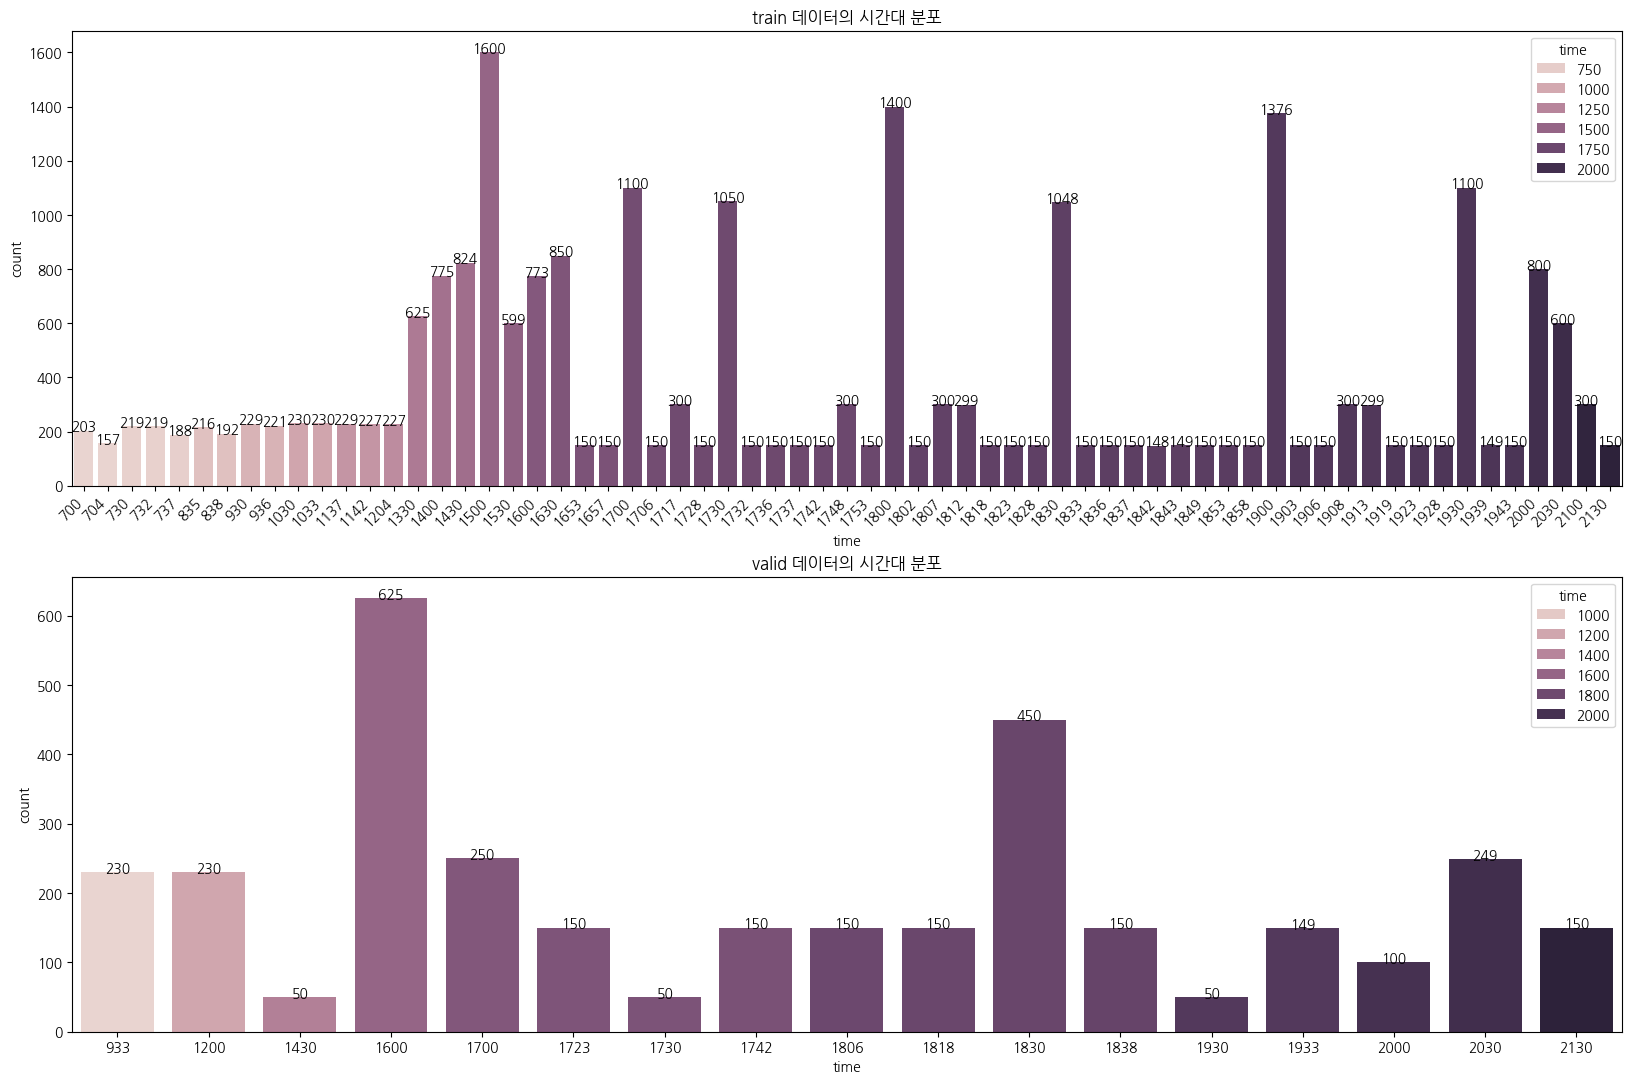

In [141]:
# 시간대 분포
fig, axes = plt.subplots(2,1, figsize=(20,13))

sns.countplot(data=train_df, x='time', ax=axes[0], hue='time')
sns.countplot(data=valid_df, x='time', ax=axes[1], hue='time')

for p in axes[0].patches:
    height = p.get_height()
    if height:
        axes[0].text(p.get_x() + p.get_width() / 2. , height,
                    int(height), ha = 'center', size = 10)

for p in axes[1].patches:
    height = p.get_height()
    if height:
        axes[1].text(p.get_x() + p.get_width() / 2. , height,
                  int(height), ha = 'center', size = 10)
    

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

axes[0].set_title("train 데이터의 시간대 분포")
axes[1].set_title("valid 데이터의 시간대 분포")

plt.show()

In [61]:
# 17:00시 기준으로 낮/밤으로 나눈 train 이미지 수
ranges = [0, 1700, 2400]
time_bins_train_df = pd.cut(list(train_df["time"]), ranges)
time_bins_train_df.describe()

,counts,freqs
categories,,
"(0, 1700]",10433,0.435598
"(1700, 2400]",13518,0.564402


In [62]:
# 17:00시 기준으로 낮/밤으로 나눈 valid 이미지 수
ranges = [0, 1700, 2400]
time_bins_valid_df = pd.cut(list(valid_df["time"]), ranges)
time_bins_valid_df.describe()

,counts,freqs
categories,,
"(0, 1700]",1385,0.415542
"(1700, 2400]",1948,0.584458


## 날씨 분포

C:\Users\SBA\AppData\Local\Temp\ipykernel_6552\1781024138.py:4: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(data=train_df, x='weather', ax=axes[0], hue='weather', palette = sns.color_palette("pastel"))
C:\Users\SBA\AppData\Local\Temp\ipykernel_6552\1781024138.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(data=valid_df, x='weather', ax=axes[1], hue='weather', palette = sns.color_palette("pastel"))


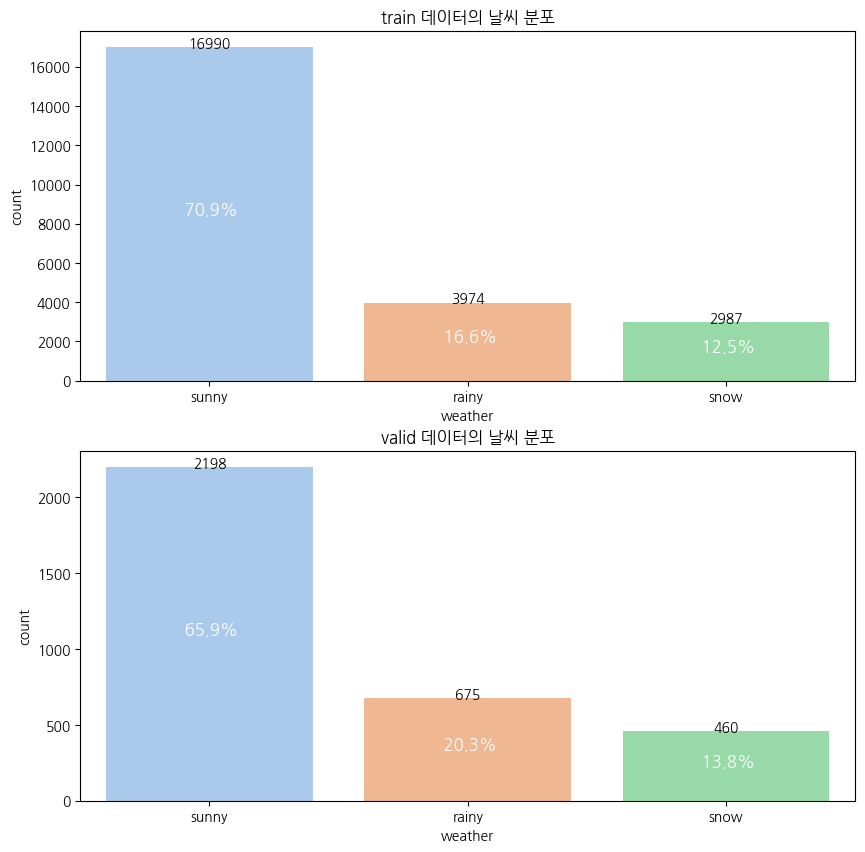

In [49]:
# 날씨 분포
fig, axes = plt.subplots(2,1, figsize=(10,10))

sns.countplot(data=train_df, x='weather', ax=axes[0], hue='weather', palette = sns.color_palette("pastel"))
sns.countplot(data=valid_df, x='weather', ax=axes[1], hue='weather', palette = sns.color_palette("pastel"))

for p in axes[0].patches:
    height = p.get_height()
    # count
    axes[0].text(p.get_x() + p.get_width() / 2. , height+3,
                  int(height), ha = 'center', size = 10)
    # percentage
    axes[0].text(p.get_x() + p.get_width() / 2. , height//2-1, 
                 f'{(p.get_height()/len(train_df))*100: 1.1f}%', ha = 'center', size = 12, color='white')

for p in axes[1].patches:
    height = p.get_height()
    # count
    axes[1].text(p.get_x() + p.get_width() / 2. , height,
                  int(height), ha = 'center', size = 10)
    # percentage
    axes[1].text(p.get_x() + p.get_width() / 2. , height//2-1, 
                 f'{(p.get_height()/len(valid_df))*100: 1.1f}%', ha = 'center', size = 12, color='white')
    

axes[0].set_title("train 데이터의 날씨 분포")
axes[1].set_title("valid 데이터의 날씨 분포")

plt.show()

C:\Users\SBA\AppData\Local\Temp\ipykernel_6552\2267791905.py:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(data=train_df, x='weather', ax=axes[0], hue='CH', palette = sns.color_palette("pastel"))
C:\Users\SBA\AppData\Local\Temp\ipykernel_6552\2267791905.py:5: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(data=valid_df, x='weather', ax=axes[1], hue='CH', palette = sns.color_palette("pastel"))


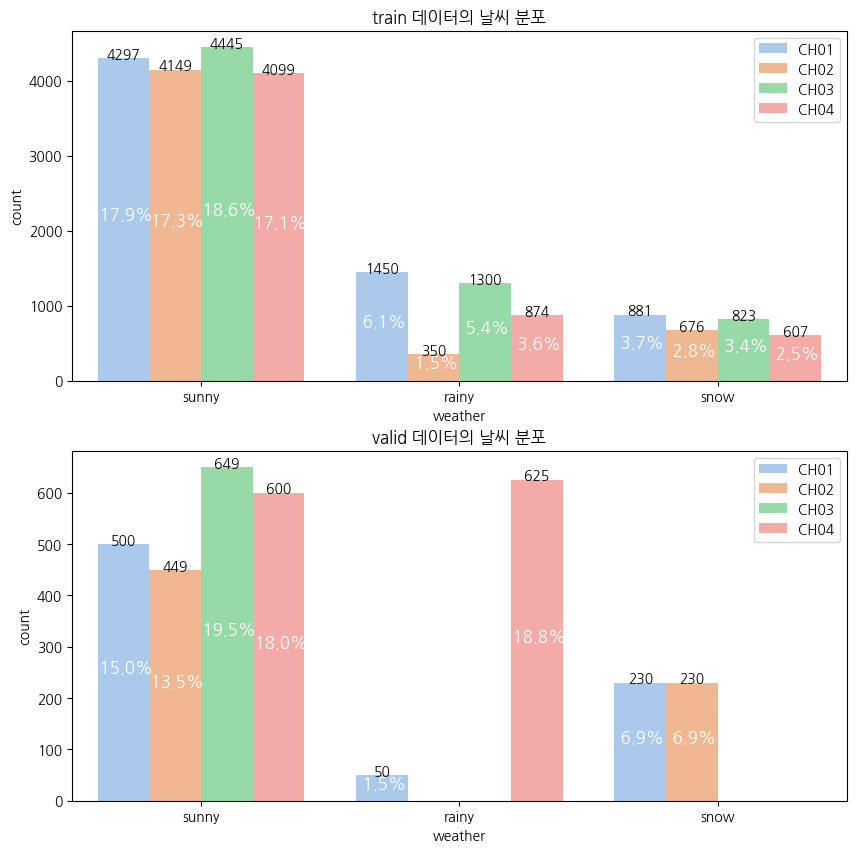

In [82]:
# 채널별 날씨 분포
fig, axes = plt.subplots(2,1, figsize=(10,10))

sns.countplot(data=train_df, x='weather', ax=axes[0], hue='CH', palette = sns.color_palette("pastel"))
sns.countplot(data=valid_df, x='weather', ax=axes[1], hue='CH', palette = sns.color_palette("pastel"))

for p in axes[0].patches:
    height = p.get_height()
    if height:
        # count
        axes[0].text(p.get_x() + p.get_width() / 2. , height+1,
                    int(height), ha = 'center', size = 10)
        # percentage
        axes[0].text(p.get_x() + p.get_width() / 2. , height//2-1, 
                    f'{(p.get_height()/len(train_df))*100: 1.1f}%', ha = 'center', size = 12, color='white')

for p in axes[1].patches:
    height = p.get_height()
    if height:
        # count
        axes[1].text(p.get_x() + p.get_width() / 2. , height,
                    int(height), ha = 'center', size = 10)
        # percentage
        axes[1].text(p.get_x() + p.get_width() / 2. , height//2-1, 
                    f'{(p.get_height()/len(valid_df))*100: 1.1f}%', ha = 'center', size = 12, color='white')
    
axes[0].legend()
axes[1].legend()

axes[0].set_title("train 데이터의 날씨 분포")
axes[1].set_title("valid 데이터의 날씨 분포")

plt.show()

## class 분포

In [25]:
class_name = ["car", "bus", "truck"]

In [26]:
# txt 파일 하나 확인
# 한 이미지에 bounding box가 여러개!
test = train_labels_list[0]
print(test)
with open(test, "r") as f:
    test_contents = f.read()
    print(test_contents)

c:\Users\SBA\Downloads/dataset\train\labels\Suwon_CH01_20200720_1700_MON_9m_NH_highway_TW5_sunny_FHD_001.txt
2 0.82077 0.23104 0.04484 0.02442
2 0.91614 0.22304 0.04769 0.01881
2 0.95849 0.21583 0.03843 0.01962
2 0.74984 0.36919 0.05391 0.04494
2 0.79173 0.46378 0.15276 0.12402
2 0.57591 0.26407 0.04774 0.02882
2 0.50583 0.27108 0.03986 0.03243
2 0.73271 0.33502 0.04322 0.02932
0 0.50455 0.40262 0.06903 0.0266
0 0.1745 0.50505 0.11492 0.04817
0 0.39732 0.49889 0.10709 0.04525
2 0.70497 0.35442 0.04213 0.02706
2 0.83843 0.34193 0.04178 0.02341
0 0.69104 0.33135 0.03894 0.01694
0 0.96514 0.38035 0.0617 0.02306
2 0.31329 0.53458 0.12037 0.07069
0 0.64729 0.32154 0.03844 0.01863
0 0.62844 0.32979 0.03568 0.01637
0 0.65905 0.34302 0.04425 0.02091
0 0.92468 0.38569 0.06423 0.02916
2 0.69602 0.66324 0.20449 0.12859
0 0.0731 0.33914 0.05694 0.01882
0 0.12755 0.32512 0.04626 0.02122
0 0.32647 0.33654 0.03985 0.01922
0 0.35316 0.36116 0.05195 0.02122
0 0.45637 0.34134 0.04199 0.01761
2 0.50512 0

In [27]:
train_class_df = train_df[class_name]
valid_class_df = valid_df[class_name]
train_class_df

,car,bus,truck
0,14,0,14
1,14,0,16
2,23,0,21
3,12,2,17
4,17,2,18
...,...,...,...
23946,3,0,1
23947,2,0,0
23948,4,0,1
23949,0,0,1


In [28]:
train_class_df.sum()

car      299607
bus       12074
truck     93215
dtype: int64

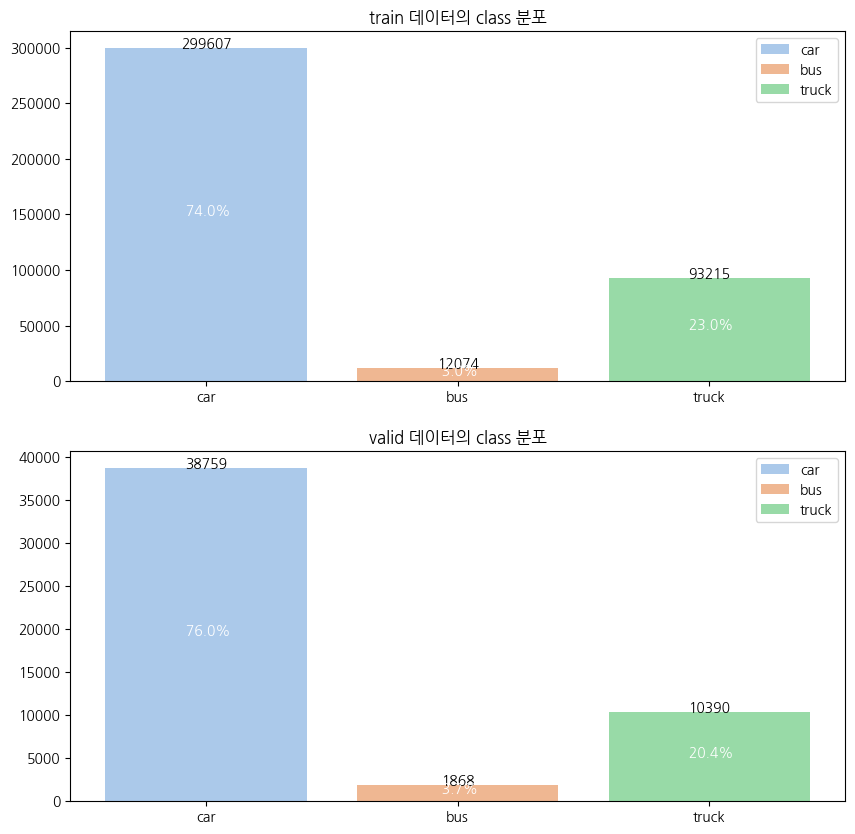

In [29]:
# class 분포
fig, axes = plt.subplots(2,1, figsize=(10,10))

axes[0].bar(x=train_class_df.sum().index, height= train_class_df.sum(), 
            label=class_name, color=['#abc9ea', '#efb792', '#98daa7'])
axes[1].bar(x=valid_class_df.sum().index, height= valid_class_df.sum(), 
            label=class_name, color=['#abc9ea', '#efb792', '#98daa7'])

for p in axes[0].patches:
    height = p.get_height()
    # count
    axes[0].text(p.get_x() + p.get_width() / 2. , height,
                  int(height), ha = 'center', size = 10)
    # percentage
    axes[0].text(p.get_x() + p.get_width() / 2. , height//2-1, 
                 f'{(p.get_height()/sum(train_class_df.sum()))*100: 1.1f}%', ha = 'center', size = 10, color='white')

for p in axes[1].patches:
    height = p.get_height()
    # count
    axes[1].text(p.get_x() + p.get_width() / 2. , height,
                  int(height), ha = 'center', size = 10)
    # percentage
    axes[1].text(p.get_x() + p.get_width() / 2. , height//2-3, 
                 f'{(p.get_height()/sum(valid_class_df.sum()))*100: 1.1f}%', ha = 'center', size = 10, color='white')
    
axes[0].legend()
axes[1].legend()
    
axes[0].set_title("train 데이터의 class 분포")
axes[1].set_title("valid 데이터의 class 분포")

plt.show()

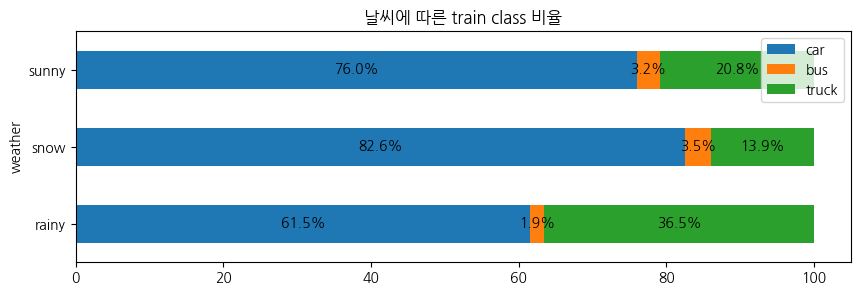

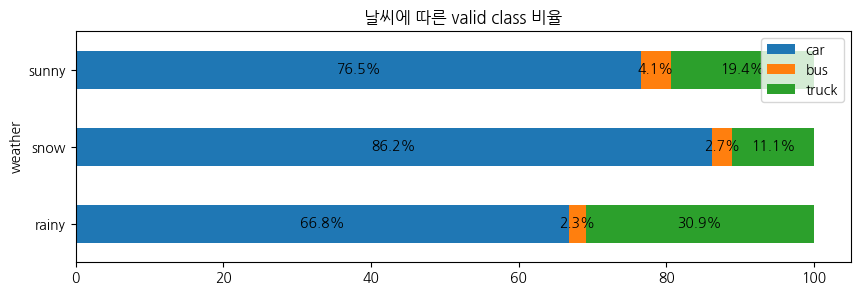

In [32]:
# 날씨에 따른 class 비율
# Percentage Stacked Bar Plot

train_weather_class_df = train_df.groupby("weather")[class_name].sum()
train_weather_class_df['sum'] = train_weather_class_df.values.sum(axis=1)
train_weather_class_df = (train_weather_class_df[class_name].div(train_weather_class_df['sum'].values, axis=0)*100).reset_index()


# plot a Stacked Bar Chart using matplotlib 
train_weather_class_df.plot( 
  x = 'weather',  
  kind = 'barh',  
  stacked = True,  
  title = '날씨에 따른 train class 비율',  
  mark_right = True, figsize=(10,3)) 

df_total = train_weather_class_df["car"] + train_weather_class_df["bus"] + train_weather_class_df["truck"] 
df_rel = train_weather_class_df[train_weather_class_df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel: 
    for i, (cs, ab, pc) in enumerate(zip(train_weather_class_df.iloc[:, 1:].cumsum(1)[n],  
                                         train_weather_class_df[n], df_rel[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center')


valid_weather_class_df = valid_df.groupby("weather")[class_name].sum()
valid_weather_class_df['sum'] = valid_weather_class_df.values.sum(axis=1)
valid_weather_class_df = (valid_weather_class_df[class_name].div(valid_weather_class_df['sum'].values, axis=0)*100).reset_index()


# plot a Stacked Bar Chart using matplotlib 
valid_weather_class_df.plot( 
  x = 'weather',  
  kind = 'barh',  
  stacked = True,  
  title = '날씨에 따른 valid class 비율',  
  mark_right = True, figsize=(10,3)) 

df_total = valid_weather_class_df["car"] + valid_weather_class_df["bus"] + valid_weather_class_df["truck"] 
df_rel = valid_weather_class_df[valid_weather_class_df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel: 
    for i, (cs, ab, pc) in enumerate(zip(valid_weather_class_df.iloc[:, 1:].cumsum(1)[n],  
                                         valid_weather_class_df[n], df_rel[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center')


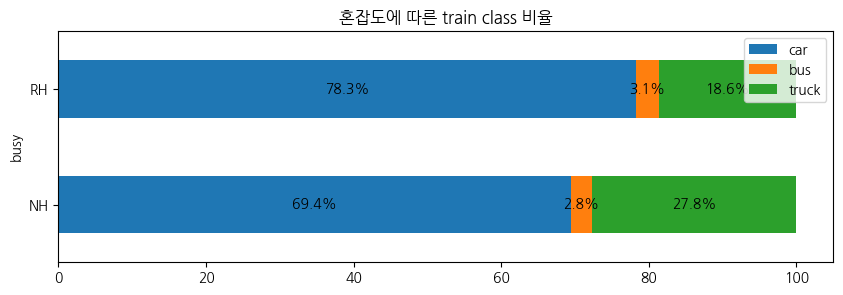

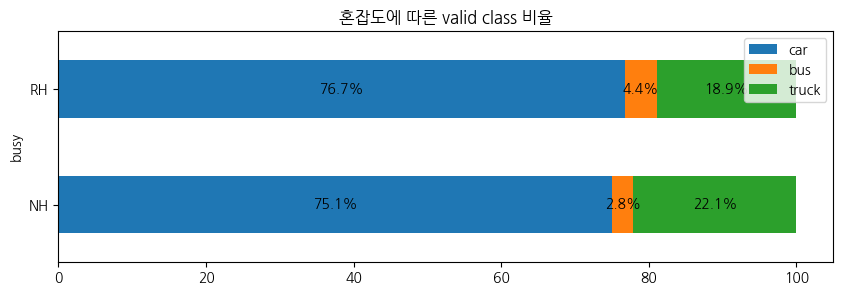

In [33]:
# 혼잡도에 따른 class 비율
# Percentage Stacked Bar Plot

train_busy_class_df = train_df.groupby("busy")[class_name].sum()
train_busy_class_df['sum'] = train_busy_class_df.values.sum(axis=1)
train_busy_class_df = (train_busy_class_df[class_name].div(train_busy_class_df['sum'].values, axis=0)*100).reset_index()


# plot a Stacked Bar Chart using matplotlib 
train_busy_class_df.plot( 
  x = 'busy',  
  kind = 'barh',  
  stacked = True,  
  title = '혼잡도에 따른 train class 비율',  
  mark_right = True, figsize=(10,3)) 

df_total = train_busy_class_df["car"] + train_busy_class_df["bus"] + train_busy_class_df["truck"] 
df_rel = train_busy_class_df[train_busy_class_df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel: 
    for i, (cs, ab, pc) in enumerate(zip(train_busy_class_df.iloc[:, 1:].cumsum(1)[n],  
                                         train_busy_class_df[n], df_rel[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center')


valid_busy_class_df = valid_df.groupby("busy")[class_name].sum()
valid_busy_class_df['sum'] = valid_busy_class_df.values.sum(axis=1)
valid_busy_class_df = (valid_busy_class_df[class_name].div(valid_busy_class_df['sum'].values, axis=0)*100).reset_index()


# plot a Stacked Bar Chart using matplotlib 
valid_busy_class_df.plot( 
  x = 'busy',  
  kind = 'barh',  
  stacked = True,  
  title = '혼잡도에 따른 valid class 비율',  
  mark_right = True, figsize=(10,3)) 

df_total = valid_busy_class_df["car"] + valid_busy_class_df["bus"] + valid_busy_class_df["truck"] 
df_rel = valid_busy_class_df[valid_busy_class_df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel: 
    for i, (cs, ab, pc) in enumerate(zip(valid_busy_class_df.iloc[:, 1:].cumsum(1)[n],  
                                         valid_busy_class_df[n], df_rel[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center')
